#  Exploratory Data Analysis on Stroke Prediction Dataset 

This notebook looks into various Python based ML and data science libraries in an attempt to build a ML model with Exploratory Data Analysis which is capable of predicting whether patient will have stroke or not based on given attributes.



We're going to take following approach :
1. Problem definition/statement
2. Importing Necessary libraries & tools
3. Data loading and cleaning
4. Exploratory Data Analysis
5. Insights

# Problem definition/statement

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.Each row in the data provides relevant information about the patient.


About the Dataset:

1. _id_: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable
for this patient.

## PREPARING THE TOOLS


In [2]:
#import all the tools


# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## LOADING DATA

In [3]:
# lets check the first five rows of dataset
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# lets check the last five rows of dataset
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
# lets check the shape of dataset
data.shape


(5110, 12)

In [6]:
# lets check for all columns in dataset
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# lets check for all information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#Generate the descriptive statistics
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## DATA CLEANING


#### 1) ID is nothing but a unique number assigned to every patient to keep track of them and making them unique.There is no need for ID it’s completely useless so let’s remove it.

In [9]:
data.drop("id",inplace=True,axis=1)


#### 2) Gender:This attribute states the gender of the patient. Let’s see how does Gender affects and Gender wise comparison of stroke rate.

In [10]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [11]:
#Seems that there is only 1 value of other in gender column I will drop it
data.drop(data.loc[data['gender']=='Other'].index, inplace=True)

In [12]:
print('Value Counts\n',data['gender'].value_counts())


Value Counts
 Female    2994
Male      2115
Name: gender, dtype: int64


 #### 3)Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let’s see how does it affect the chances of having a stroke.

In [13]:
# checking any null values are there or not.
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
print(data.groupby(['bmi','stroke'])['stroke'].count())

bmi   stroke
10.3  0         1
11.3  0         1
11.5  0         1
12.0  0         1
12.3  0         1
               ..
66.8  0         1
71.9  0         1
78.0  0         1
92.0  0         1
97.6  0         1
Name: stroke, Length: 552, dtype: int64


#### Since there are some rows in the dataset where bmi is null but stroke is 1, we will not be removing the rows but rather, impute it with the mean of the column.


In [15]:
mean_value = data['bmi'].mean()
data.fillna(mean_value, inplace = True)

In [16]:
# after cleansing the data then the dataset look like
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [17]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## EXPLORATORY DATA ANALYSIS

#### Just by looking at the sample of the dataset, we can figure out the columns and the type of data that they contain.

#### The dataset contains both categorical and numerical columns.
#### Categorical columns:
    gender: Gender of the patient.
    hypertension: whether the patient suffers from hypertension (1) or not (0).
    heart_disease: whether the patient suffers from heart disease (1) or not (0).
    ever_married: marital status of the patient if married (Yes) else (No).
    work_type: The type of occupation of the patient.
    Resident_Type: The type of residence of the patient.
    smoking_status: How often does the patient smoke (if ever).
    
#### Numerical columns:
    age: Age of the Patient
    avg_glucose_level: Average Glucose Level of the patient.
    bmi: body mass index of the patient.
 
#### Output Column:
    Stroke: Whether the patient is likely to get a stroke (1) or not (0). 

In [65]:
#Visualizing the frequency of output column.
data["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

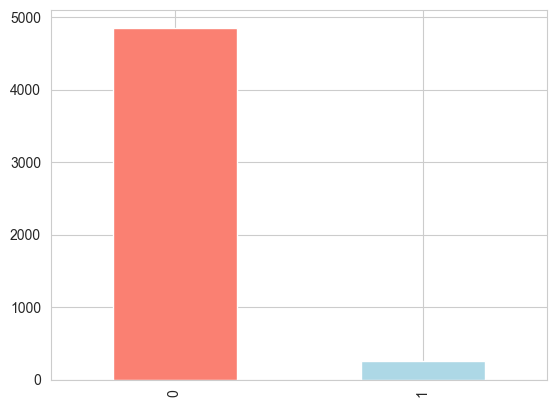

In [64]:
# Count of Patients that suffer from stroke along with those that did not.
data["stroke"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

### observations
  1. There are 2 outcomes in this dataset: 0 and 1 for the likely hood of getting a stroke.
  2. This is an imbalanced dataset since the number of patients that are likely to get a stroke is smaller when compared with   the number of patients that did not.

## Univariate Anaylsis for categorical columns




#### Studying the variables individually and gauging their impact on output column.

In [19]:
#lets start from gender
print(data['gender'].value_counts())


Female    2994
Male      2115
Name: gender, dtype: int64


<AxesSubplot: xlabel='gender', ylabel='count'>

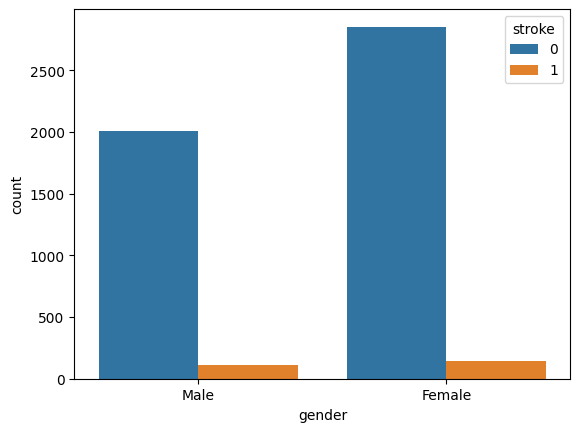

In [20]:
# This plot will help to analyze how gender will affect chances of stroke.
sns.countplot(data=data,x='gender',hue='stroke')



#### Observation:
    1.The number of female gender patients is more than the number of male gender patients for both cases.
    2.The Gender variable by itself is not enough to predict the likely hood of getting a stroke.

In [21]:
# next for hypertension
print(data['hypertension'].value_counts())

0    4611
1     498
Name: hypertension, dtype: int64


<AxesSubplot: xlabel='hypertension', ylabel='count'>

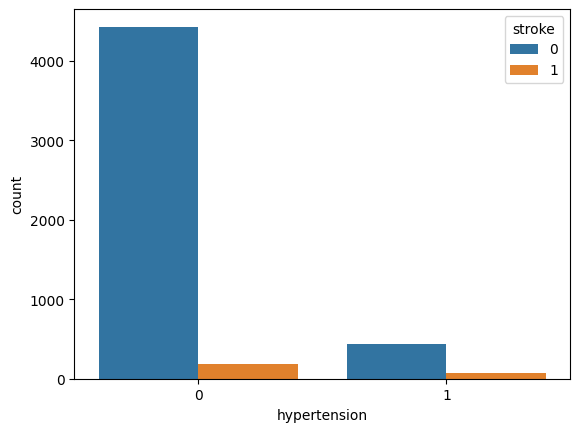

In [22]:
# This plot will help to analyze how hypertension will affect chances of stroke.
sns.countplot(data=data,x='hypertension',hue='stroke')


#### Observation:
    hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. Based on our data picture is not that clear for hypertension. It has quite little data on patients having hypertension.

In [23]:
# next for heart_disease
print(data['heart_disease'].value_counts())

0    4833
1     276
Name: heart_disease, dtype: int64


<AxesSubplot: xlabel='heart_disease', ylabel='count'>

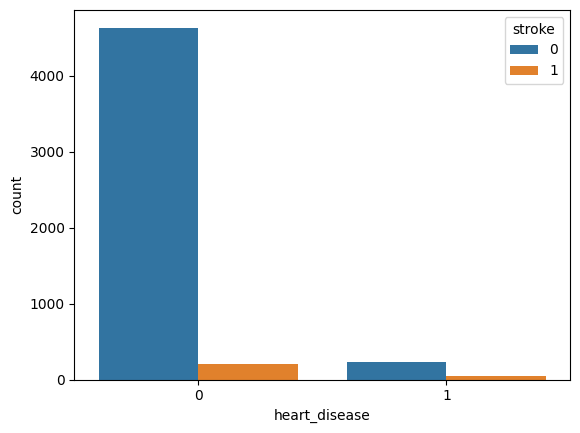

In [24]:
# This plot will help to analyze how heartdisease will affect chances of stroke.
sns.countplot(data=data,x='heart_disease',hue='stroke')

#### obersvation:
      Because of the imbalanced dataset, it’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

In [25]:
# let go for ever_married(interesting one)
print('Value Counts\n',data['ever_married'].value_counts())

Value Counts
 Yes    3353
No     1756
Name: ever_married, dtype: int64


<AxesSubplot: xlabel='ever_married', ylabel='count'>

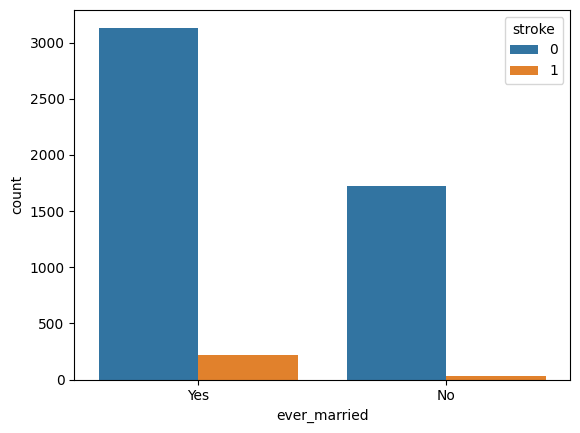

In [26]:
# This plot will help to analyze how evermarried will affect chances of stroke.
sns.countplot(data=data,x='ever_married',hue='stroke')

#### Observation:
    People who are married have a higher stroke rate.
    The marital status by itself is not a significant factor in predicting the likely hood of a stroke.

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot: xlabel='work_type', ylabel='count'>

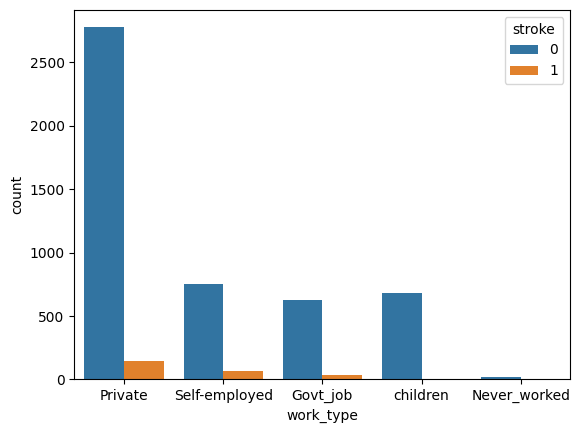

In [27]:
# let go with work_type
print(data['work_type'].value_counts())
sns.countplot(data=data,x='work_type',hue='stroke')

#### Observation:
    We don’t have much data on patients that never worked and the ones that we do have, never suffered from a stroke.
    The children category also does not contain any patient that suffered from a stroke.
    People working in the Private sector have a higher risk of getting a stroke.

Value Counts
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


<AxesSubplot: xlabel='Residence_type', ylabel='count'>

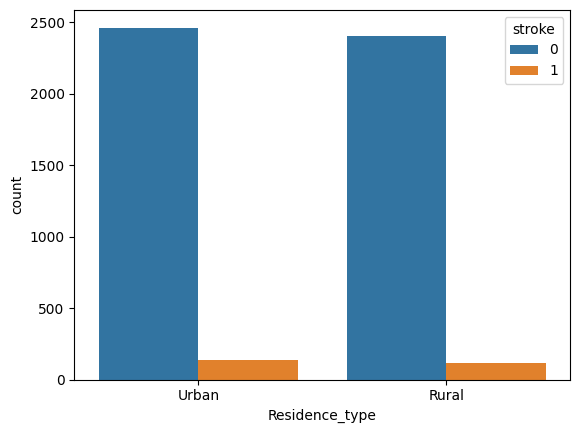

In [28]:
# let go with Resident_Type
print("Value Counts\n",data['Residence_type'].value_counts())
sns.countplot(data=data,x='Residence_type',hue='stroke')

#### Observation:
    A Comparable number of patients live in Urban and Rural regions.
    As we can see there not much difference in both attribute values.Still people live in urban hav greater chances of having stroke as compared to rural.

Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot: xlabel='smoking_status', ylabel='count'>

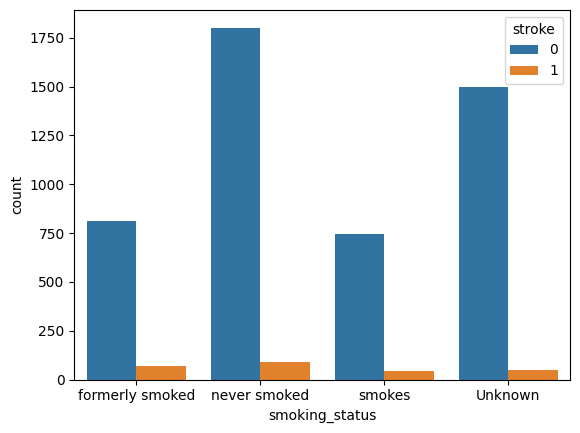

In [29]:
# let go with last columns smoking_status
print('Value Counts\n',data['smoking_status'].value_counts())
sns.countplot(data=data,x='smoking_status',hue='stroke')

#### Observation:
    smoking_status is also not a good indicator by itself of whether the patient is likely to get a stroke.

 ## Univariate Anaylsis for numerical columns

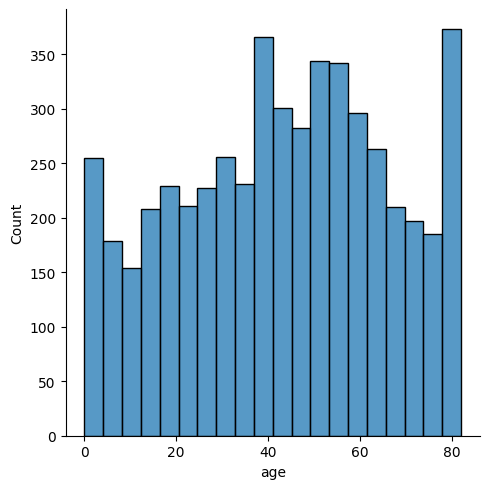

In [30]:
# first doing with AGE
sns.displot(data['age'])

<AxesSubplot: xlabel='stroke', ylabel='age'>

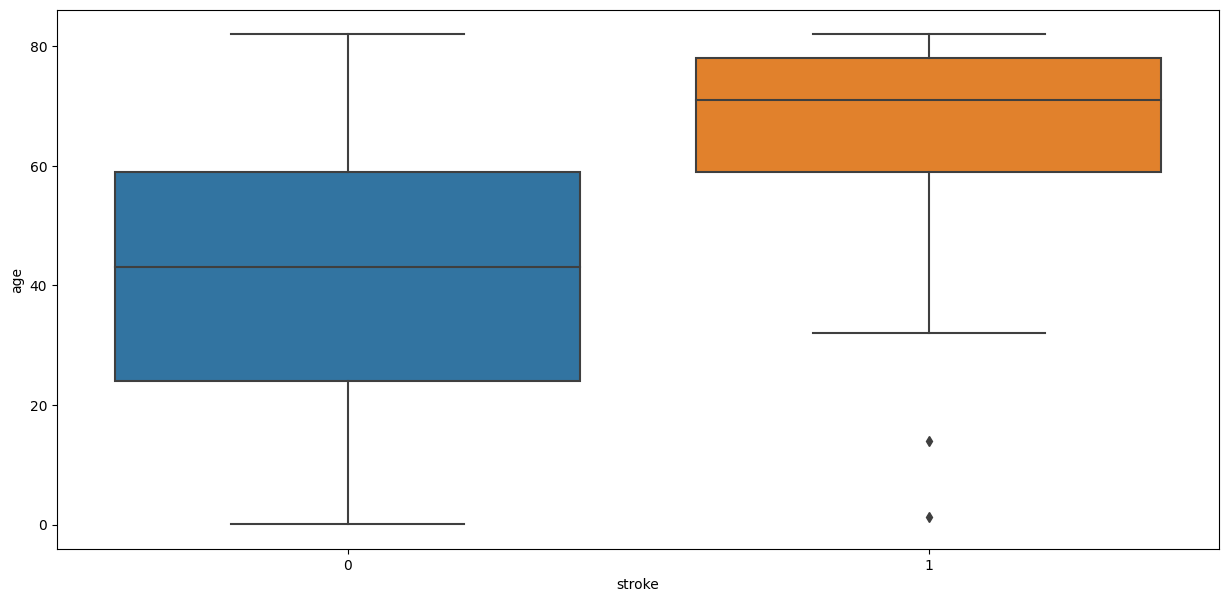

In [31]:
# This will plot a distribution plot of variable age
# Above code will plot a boxplot of variable age with respect of target attribute stroke
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')


#### Observation:
    People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits. Another observation is people not having strokes also consist of people age > 60 years.

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

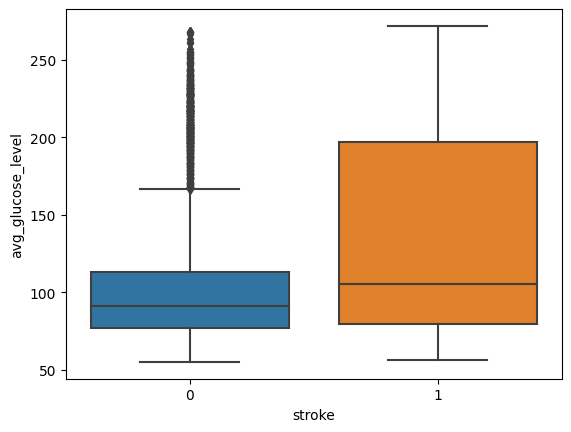

In [32]:
# LET go with avg_glucose_level

sns.boxplot(data=data,x='stroke',y='avg_glucose_level')

#### Observation:
    From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

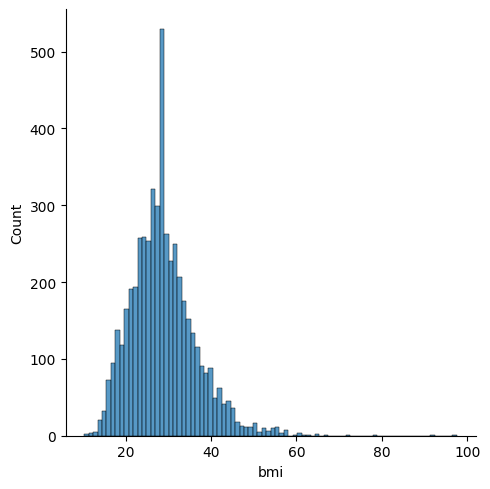

In [33]:
# let go with bmi
sns.displot(data['bmi'])



<AxesSubplot: xlabel='stroke', ylabel='bmi'>

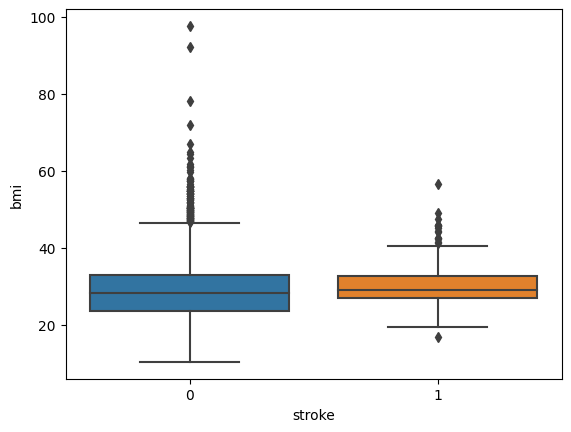

In [34]:
sns.boxplot(data=data,x='stroke',y='bmi')

#### Observation:
    There is as such no prominent observation of how does BMI affects the chances of having a stroke

## Bivariate Analysis 

Text(0.5, 1.0, 'Correlation Heatmap')

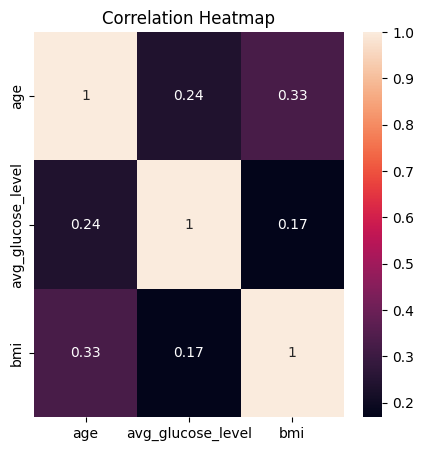

In [35]:
#let’s look at the correlation of numeric variables.
fig, ax = plt.subplots(figsize=(5, 5))
heatmap = sns.heatmap(data[['age', 'avg_glucose_level', 'bmi']].corr(), vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

#### Observation:
     There is some positive correlation between age and bmi. Overall, all 3 variables are correlated positively with each other. However, age and bmi show a stronger correlation.


C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


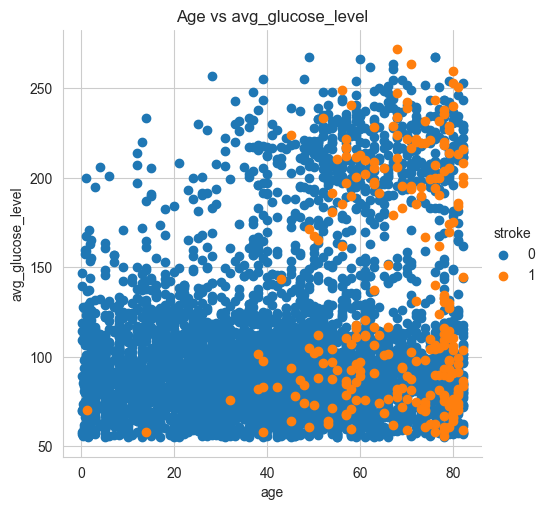

In [36]:
# LETS GO WITH ANALYSIS BTW AGE AND GLUCOSELEVEL
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="stroke", height=5).map(plt.scatter, "age", "avg_glucose_level").add_legend()
plt.title('Age vs avg_glucose_level')
plt.show()

#### Observation:
    Having more age increases the likely hood of getting a stroke.
    We can see that almost all the yellow spots are after 40. However, it is worth noting that a lot of the blue spots are 
    also present after 40.

C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


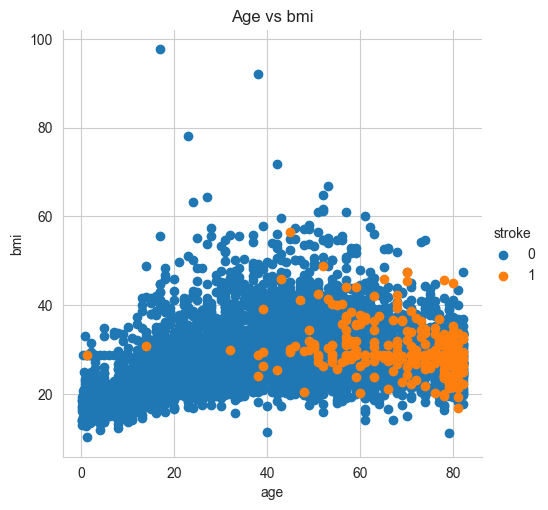

In [37]:
# LETS GO WITH ANALYSIS BTW AGE AND GLUCOSELEVEL
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="stroke", height=5).map(plt.scatter, "age", "bmi").add_legend()
plt.title('Age vs bmi')
plt.show()

#### Observation:
    Having more age plus bmi btw 20 to 40 shows increases the likely hood of getting a stroke.
    We can see that almost all the yellow spots are after 40. 

<AxesSubplot: xlabel='heart_disease', ylabel='avg_glucose_level'>

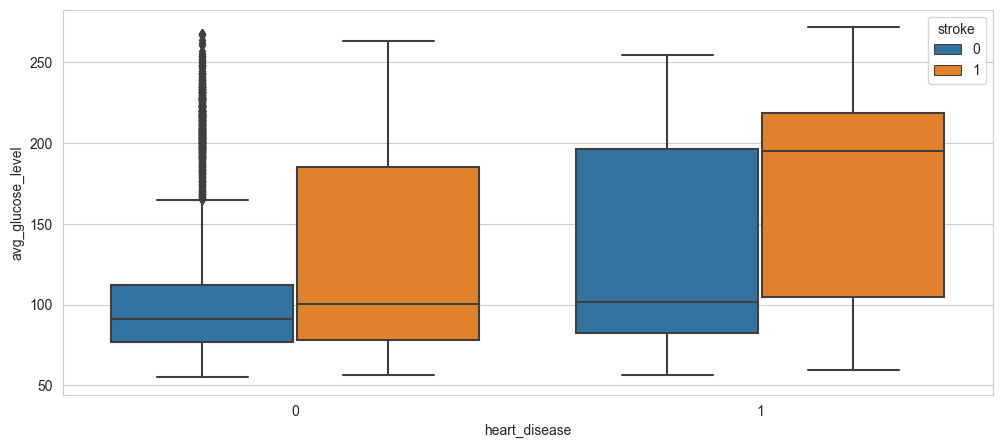

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=data)

In [39]:
data.groupby('heart_disease')['avg_glucose_level'].mean()

heart_disease
0    104.388438
1    136.818768
Name: avg_glucose_level, dtype: float64

In [40]:
data.groupby('heart_disease')['avg_glucose_level'].median()

heart_disease
0     91.250
1    106.545
Name: avg_glucose_level, dtype: float64

<AxesSubplot: xlabel='ever_married', ylabel='bmi'>

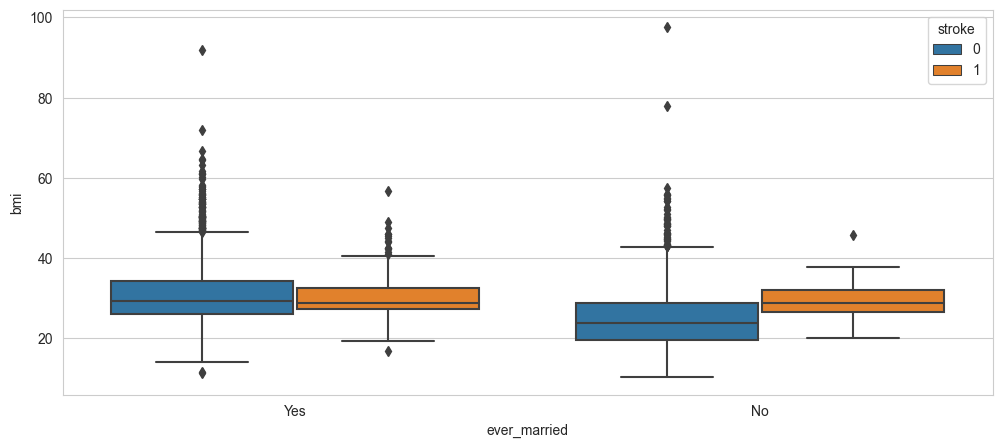

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(y='bmi', x='ever_married',hue='stroke' ,data=data)

In [42]:
data.groupby('ever_married')['bmi'].mean()

ever_married
No     25.325294
Yes    30.763820
Name: bmi, dtype: float64

In [43]:
data.groupby('ever_married')['bmi'].median()

ever_married
No     23.8
Yes    29.3
Name: bmi, dtype: float64

In [44]:
## 75th percentile

def p75(x):
    return np.quantile(x,0.75)


In [45]:
## 25th percentile
def p25(x):
    return np.quantile(x,0.25)

In [46]:
data.groupby('ever_married')['bmi'].aggregate(['mean','median',p75,p25])

,mean,median,p75,p25
ever_married,,,,
No,25.325294,23.8,28.9,19.775
Yes,30.763820,29.3,34.2,26.200


In [47]:
## lets see the Interquantile range(IQR)
iqr=data.quantile(0.75)-data.quantile(0.25)
print(iqr)

age                  36.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    36.85
bmi                   9.00
stroke                0.00
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_9912\874628470.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr=data.quantile(0.75)-data.quantile(0.25)


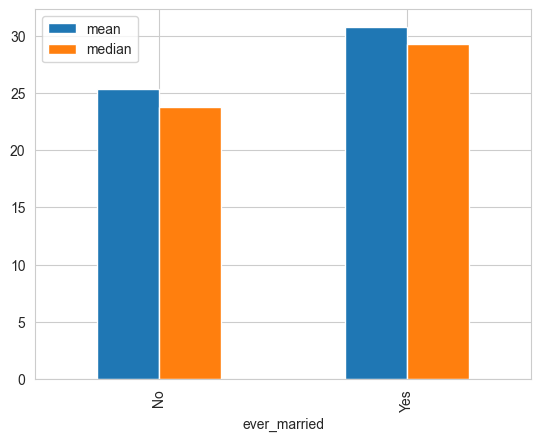

In [48]:
data.groupby('ever_married')['bmi'].aggregate(['mean','median']).plot.bar()
plt.show()

##  Some Statistics on numerical features

In [49]:
num_features = ['age', 'avg_glucose_level', 'bmi']


In [50]:
df_nums = data[num_features]
df_nums.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.60000
1,61.0,202.21,28.89456
2,80.0,105.92,32.50000
3,49.0,171.23,34.40000
4,79.0,174.12,24.00000


In [51]:
df_nums.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.894560
std,22.613575,45.285004,7.698235
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


<AxesSubplot: >

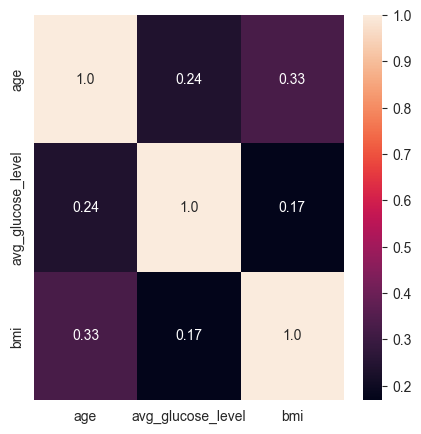

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(df_nums.corr(),annot=True,fmt='.2')

In [53]:
data.groupby('age')['bmi'].mean()

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    28.014226
79.00    27.959488
80.00    28.788338
81.00    27.951667
82.00    28.044546
Name: bmi, Length: 104, dtype: float64

In [54]:
data.groupby('age')['bmi'].median()

age
0.08     15.50
0.16     13.90
0.24     18.50
0.32     17.80
0.40     15.85
         ...  
78.00    27.90
79.00    28.50
80.00    28.80
81.00    27.65
82.00    27.30
Name: bmi, Length: 104, dtype: float64

In [55]:
## 75th percentile

def p75(x):
    return np.quantile(x,0.75)


In [56]:
## 25th percentile
def p25(x):
    return np.quantile(x,0.25)

In [57]:
data.groupby('age')['bmi'].aggregate(['mean','median',p75,p25]).head()

,mean,median,p75,p25
age,,,,
0.08,15.500000,15.50,16.200,14.800
0.16,14.766667,13.90,15.650,13.450
0.24,17.400000,18.50,18.600,16.300
0.32,18.080000,17.80,19.600,16.200
0.40,15.850000,15.85,16.625,15.075


In [58]:
## lets see the Interquantile range(IQR)
iqr=df_nums.quantile(0.75)-df_nums.quantile(0.25)
print(iqr)

age                  36.00
avg_glucose_level    36.85
bmi                   9.00
dtype: float64


## MULTIVARIATE ANALYSIS

### Multivariate analysis yields very specific information about a data set. It basically involves the analysis of more than two variables at a time. For instance, heat maps are the best way to look at three variables at a time.In multivariate analysis, it is essential to look into the data by grouping the variables and inferring decisions from them.

In [59]:
res=pd.pivot_table(data=data,index='work_type',columns='ever_married',values='stroke')
res

ever_married,No,Yes
work_type,,
Govt_job,0.051282,0.050000
Never_worked,0.000000,NaN
Private,0.017073,0.064163
Self-employed,0.063636,0.081805
children,0.002911,NaN


<AxesSubplot: xlabel='ever_married', ylabel='work_type'>

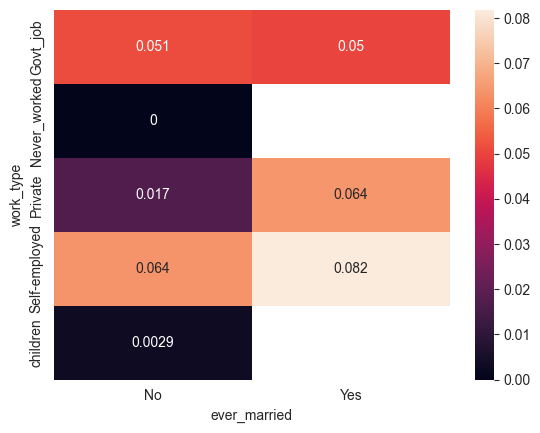

In [60]:
sns.heatmap(res,annot=True)

<AxesSubplot: xlabel='ever_married', ylabel='work_type'>

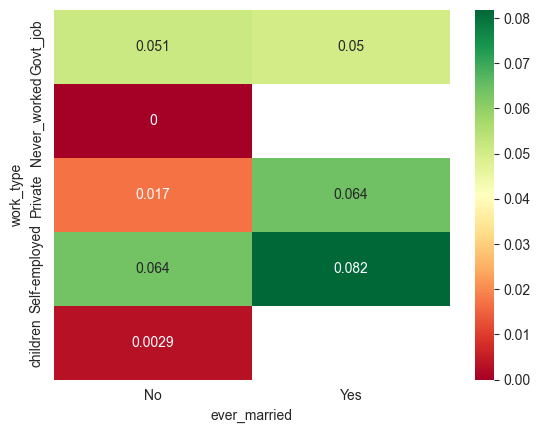

In [61]:
sns.heatmap(res,annot=True,cmap='RdYlGn')

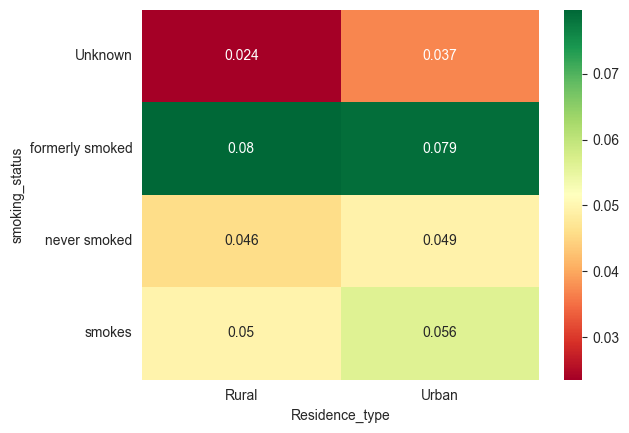

In [62]:
res1=pd.pivot_table(data=data,index='smoking_status',columns='Residence_type',values='stroke')
sns.heatmap(res1,annot=True,cmap='RdYlGn')
plt.show()

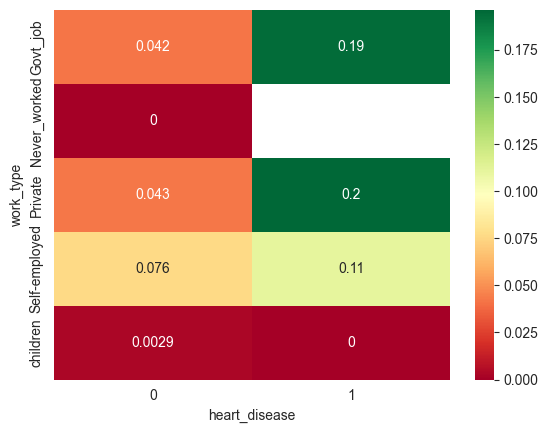

In [63]:
res1=pd.pivot_table(data=data,index='work_type',columns='heart_disease',values='stroke')
sns.heatmap(res1,annot=True,cmap='RdYlGn')
plt.show()

## FEATURE ENGINEERING
Our dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature let’s encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1.

In [66]:
cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetch columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0          

<AxesSubplot: >

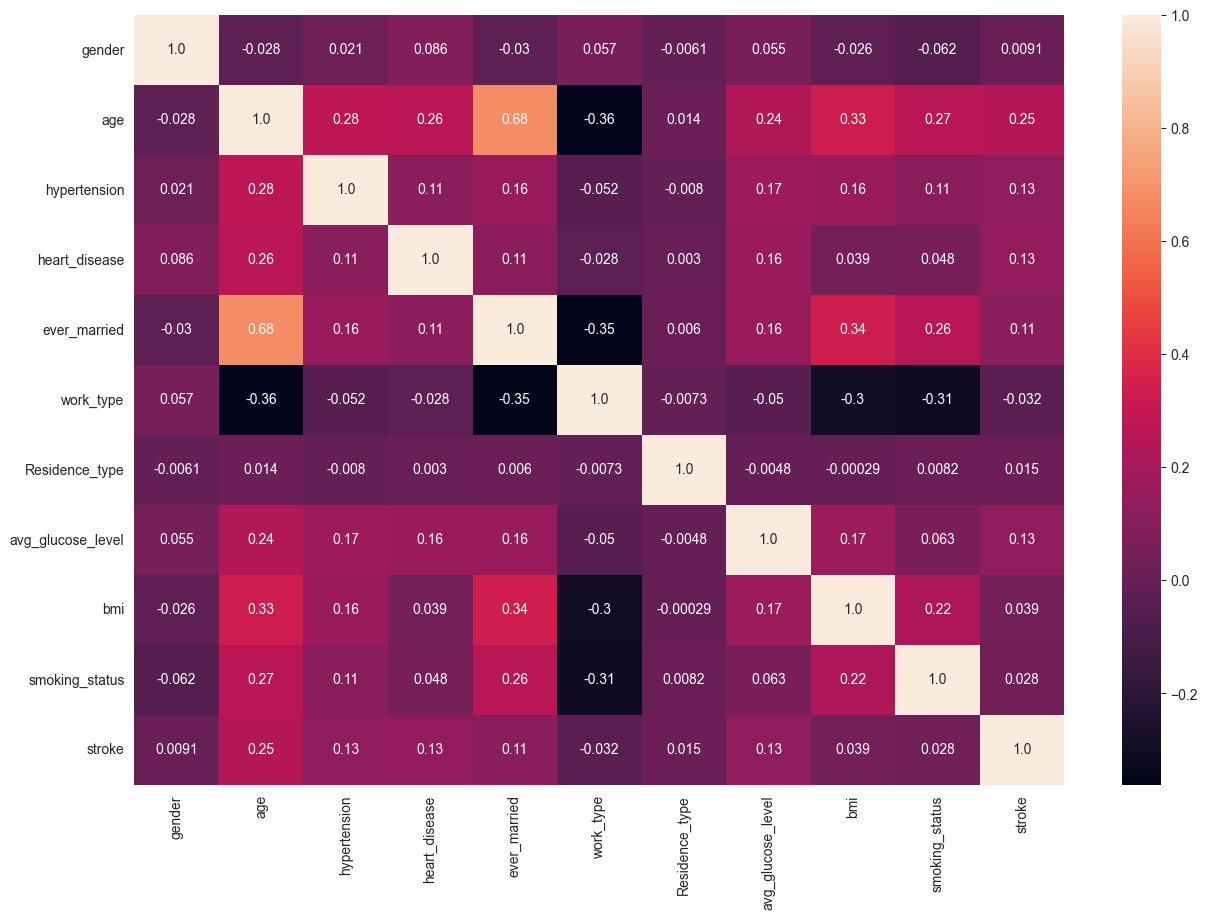

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [68]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.799849
3,heart_disease,94.666779
7,avg_glucose_level,90.550026
2,hypertension,84.919947
4,ever_married,60.609558
8,bmi,7.746392
5,work_type,5.341306
9,smoking_status,4.037898
6,Residence_type,1.213760
0,gender,0.421144


In the above result, we can see that age is a highly correlated variable and then it gets decreasing.

In [69]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [70]:
# SPLITTING THE DATA
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)

train_x.shape,test_x.shape,train_y.shape,test_y.shape


((3831, 5), (1278, 5), (3831,), (1278,))

### BALANCING THE DATASET

In [71]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [72]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7294, 5) (7294,) (2426, 5) (2426,)


In [73]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.9089035449299258
F1 Score -->  0.9033668561434193
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      1352
           1       0.85      0.96      0.90      1074

    accuracy                           0.91      2426
   macro avg       0.91      0.91      0.91      2426
weighted avg       0.92      0.91      0.91      2426

